In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions, plot_history

In [2]:
'''Train a Bidirectional LSTM on the IMDB sentiment classification task.
'''

np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.layers.core import Flatten
from keras.datasets import imdb
from keras_tqdm import TQDMNotebookCallback

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('X_train shape(before pad_sequences): ', X_train.shape)
print('X_test shape(before pad_sequences): ', X_train.shape)

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
X_train shape(before pad_sequences):  (25000,)
X_test shape(before pad_sequences):  (25000,)
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


In [3]:
layers = 128
dropout = 0.2
epochs = 2

# LSTM

In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(layers))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


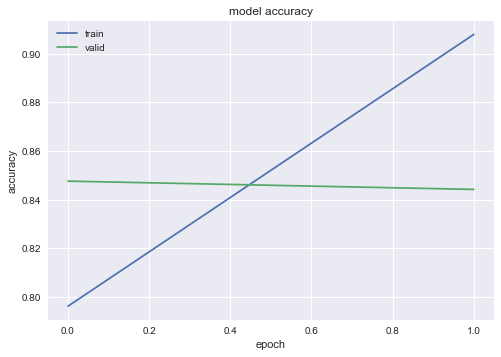

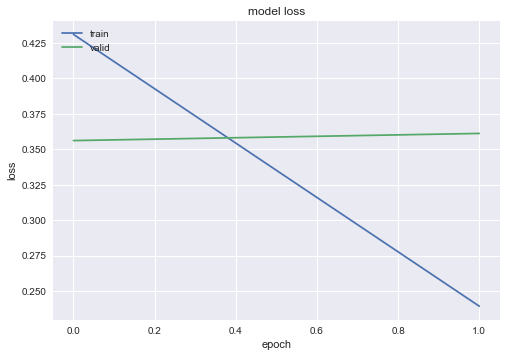

In [6]:
plot_history(history)

In [7]:
score = model.evaluate(X_test, y_test)
score[1]

24992/25000 [============================>.] - ETA: 0s

0.84248000000000001

# BLSTM

In [8]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(layers)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


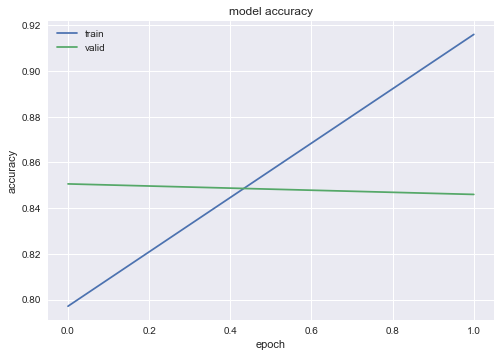

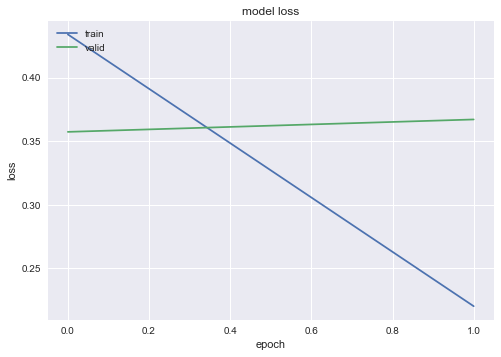

In [10]:
plot_history(history)

In [11]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 60s    


0.84096000000000004

# SimpleRNN

In [12]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


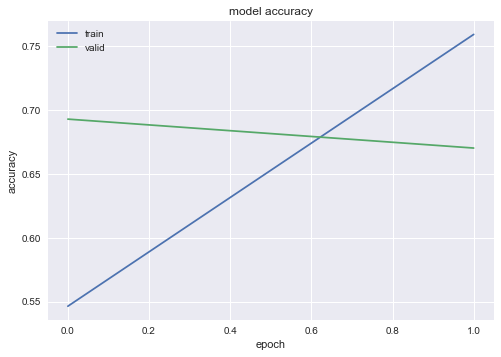

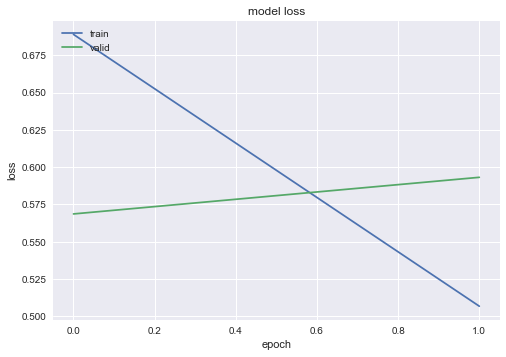

In [14]:
plot_history(history)

In [15]:
score = model.evaluate(X_test, y_test)
score[1]

24992/25000 [============================>.] - ETA: 0s

0.68491999999999997

# GRU

In [16]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(GRU(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


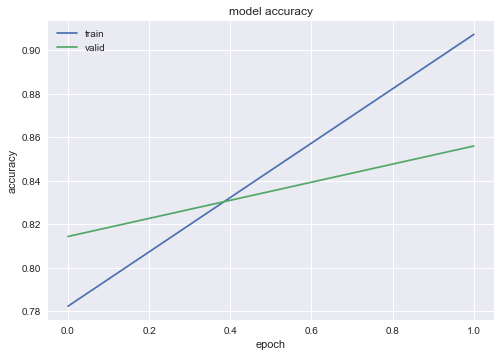

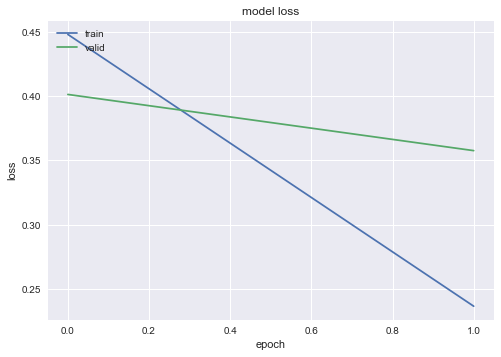

In [18]:
plot_history(history)

In [19]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 28s    


0.84716000000000002

# Dense

In [43]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Dense(layers)) 
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dense_3 (Dense)              (None, 100, 128)          16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12801     
Total params: 2,589,313
Trainable params: 2,589,313
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(show_inner=True)])

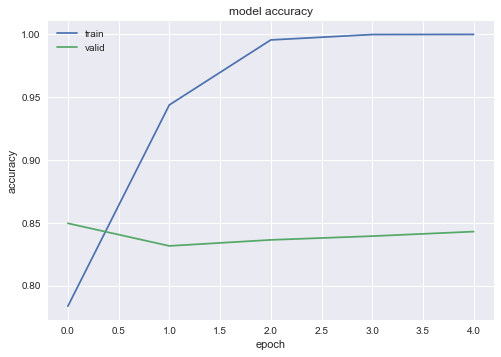

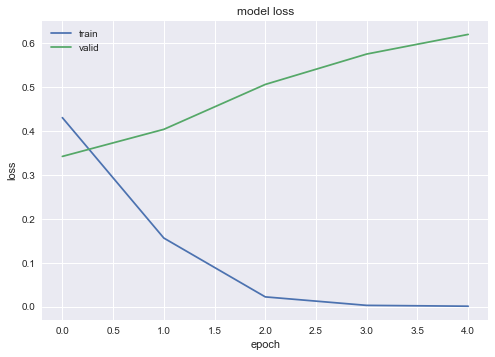

In [45]:
plot_history(history)

In [46]:
score = model.evaluate(X_test, y_test)
score[1]

24608/25000 [============================>.] - ETA: 0s

0.84075999999999995

# Summary

| 모델 | 레이어 | 드롭아웃 | 에폭 | 시간 | 정확도(valid) | 정확도(test) | 의견 |
|------|------|------|------|------|------|------|------|
| LSTM | 128 | 0.2 | 2 | 2:59 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 2:58 | 0.83 | 0.83 | |
| BLSTM | 128 | 0.2 | 2 | 3:52 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 3:53 | 0.83 | 0.84 | |
| SimpleRNN | 128 | 0.2 | 2 | 0:50 | 0.77 | 0.77 | |
| | 128 | 0.2 | 10 | 0:50 | 0.72 | 0.73 | 에폭을 높여도 80점을 넘기지 못하며 학습을 할 수록 오히려 점수가 떨어진다. |
| | 128 | 0.5 | 2 | 0:52 | 0.77 | 0.78 | |
| GRU | 128 | 0.2 | 2 | 2:32 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 2:28 | 0.84 | 0.84 | |
| | 128 | 0.5 | 10 | 2:23 | 0.81 | 0.80 | 학습을 할 수록 점수가 더 떨어진다. |
|Dense|128|0.5|2|0:25|0.84|0.84||
||128|	0.2| 	2|	0:24|	0.83|	0.83|| 	
||64|	0.5| 	2|	0:25|	0.84|	0.84|| 	
||64|	0.2| 	2|	0:25|	0.84|	0.83||	
||64|	0.5| 	10|	0:25|	0.82|	0.82|	5 에폭 이후 loss가 0.01에서 더 이상 떨어지지 않는다.|
||64|	0.2| 	10|	0:24|	0.84|	0.81| 	5 에폭 이후 loss가 0.001에서 더 이상 떨어지지 않는다.|
||128|	0.2| 	10|	0:22|	0.84|	0.83| 	마찬가지로 5 에폭 이후 loss가 0.001 미만이다.|

# Predict Probability

In [47]:
X_test.shape

(25000, 100)

In [48]:
X_test[2]

array([  674,    74,  1462,   334,     5,    47,     6,    55,  1300,
        5385,  5695,  1841,     4,   372,    11,    27,   113,    29,
           9,    24,   565,   195,     8,  5587,    48,    25,   181,
           8,    67,    52,   116,     5,     4,   635,     7,   113,
          81,    24,   717,    14,    20,   514,   139,     4,  3756,
         582,     8,  1868,     2,     5,    32,     4,   231,     7,
           6,  2702,    46,     7,  1912,  2714,    15,    13,    38,
        5846,    75,    26,    32,  1912, 18659,   514,  4414,   742,
          12,     9,    64,    34,   170,     2,    15,    25,   923,
          15,    25,    26,    66,   170,  4451,   742,    25,    28,
           6, 12762,  4421,    21,   121,     9,   129,   483,    10,    10], dtype=int32)

In [49]:
word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

In [50]:
' '.join(index_word.get(w) for w in X_test[2])

"five been shock fan to there is time terms cancer bug soap of next this be acting all it his police that's in iconic what have pretty in can very love to of across br acting people his sequence as on starts something of explicit experience in ball and to an of minutes br is caine some br hopes understood for was her strings bad he an hopes skye starts celebrity richard that it see who part and for have society for have he had part confidence richard have one is supremely judy not know it man humor i i"

In [57]:
x = X_test[2].reshape(1, 100)
x.shape
# x.T
model.predict_proba(x)

1/1 [==============================] - 0s


array([[ 0.99917799]], dtype=float32)

In [59]:
model.predict(x)

array([[ 0.99917799]], dtype=float32)

In [60]:
model.evaluate(x)

TypeError: evaluate() missing 1 required positional argument: 'y'